# Note
This notebook is broken.
Since the time recorded for Chronos are missing. Will need to do the evaluation again.

In [1]:
import os
from dotenv import load_dotenv
from tabpfn_time_series.experimental.visualization.data_processing import (
    load_wandb_runs,
)

load_dotenv()

df = load_wandb_runs(
    entity=os.getenv("WANDB_ENTITY"),
    project=os.getenv("WANDB_PROJECT_FEATURE_ABLATION"),
    tags=["main"],
)

Fetching runs from W&B...
Found 97 runs in 12.78 seconds
Extracting basic run info...


Extracting run info: 100%|██████████| 97/97 [00:00<00:00, 106309.77it/s]


Done extracting run info for 97 runs in 0.00 seconds


Processing runs: 100%|██████████| 97/97 [00:00<00:00, 291229.41it/s]


In [15]:
interested_columns = [
    "MASE_0.5",
    "wSQL_mean",
    "dataset_full_name",
    "config/config_path",
    "config/dataset",
    "term",
    "state",
    "_timestamp",
    "_runtime",
]

df = raw_df[interested_columns].copy()
df["config/config_path"] = (
    df["config/config_path"].str.split("/").str[-1].str.replace(".json", "")
)
df.rename(columns={"config/config_path": "config_name"}, inplace=True)

# Drop rows that have NaN values in any column
df = df.dropna()

## Import Chronos Inference Time

In [16]:
import pandas as pd
from tabpfn_time_series.experimental.visualization.data_processing import (
    load_external_results,
    get_common_subset,
)

# Load external results
interested_models = ["Seasonal_Naive"]

external_df = load_external_results(interested_models=interested_models)
# Combine with main DataFrame
df = pd.concat([df, external_df])
df = get_common_subset(df)

Found and combined 2 'all_results.csv' files
combined_results_df.shape (194, 16)


Number of datasets with all configurations completed: 97
config_name
chronos-bolt-small                                    97
chronos-bolt-tiny                                     97
second-minute-paper-auto-seasonal-linear-pad-2-ex0    97
dtype: int64


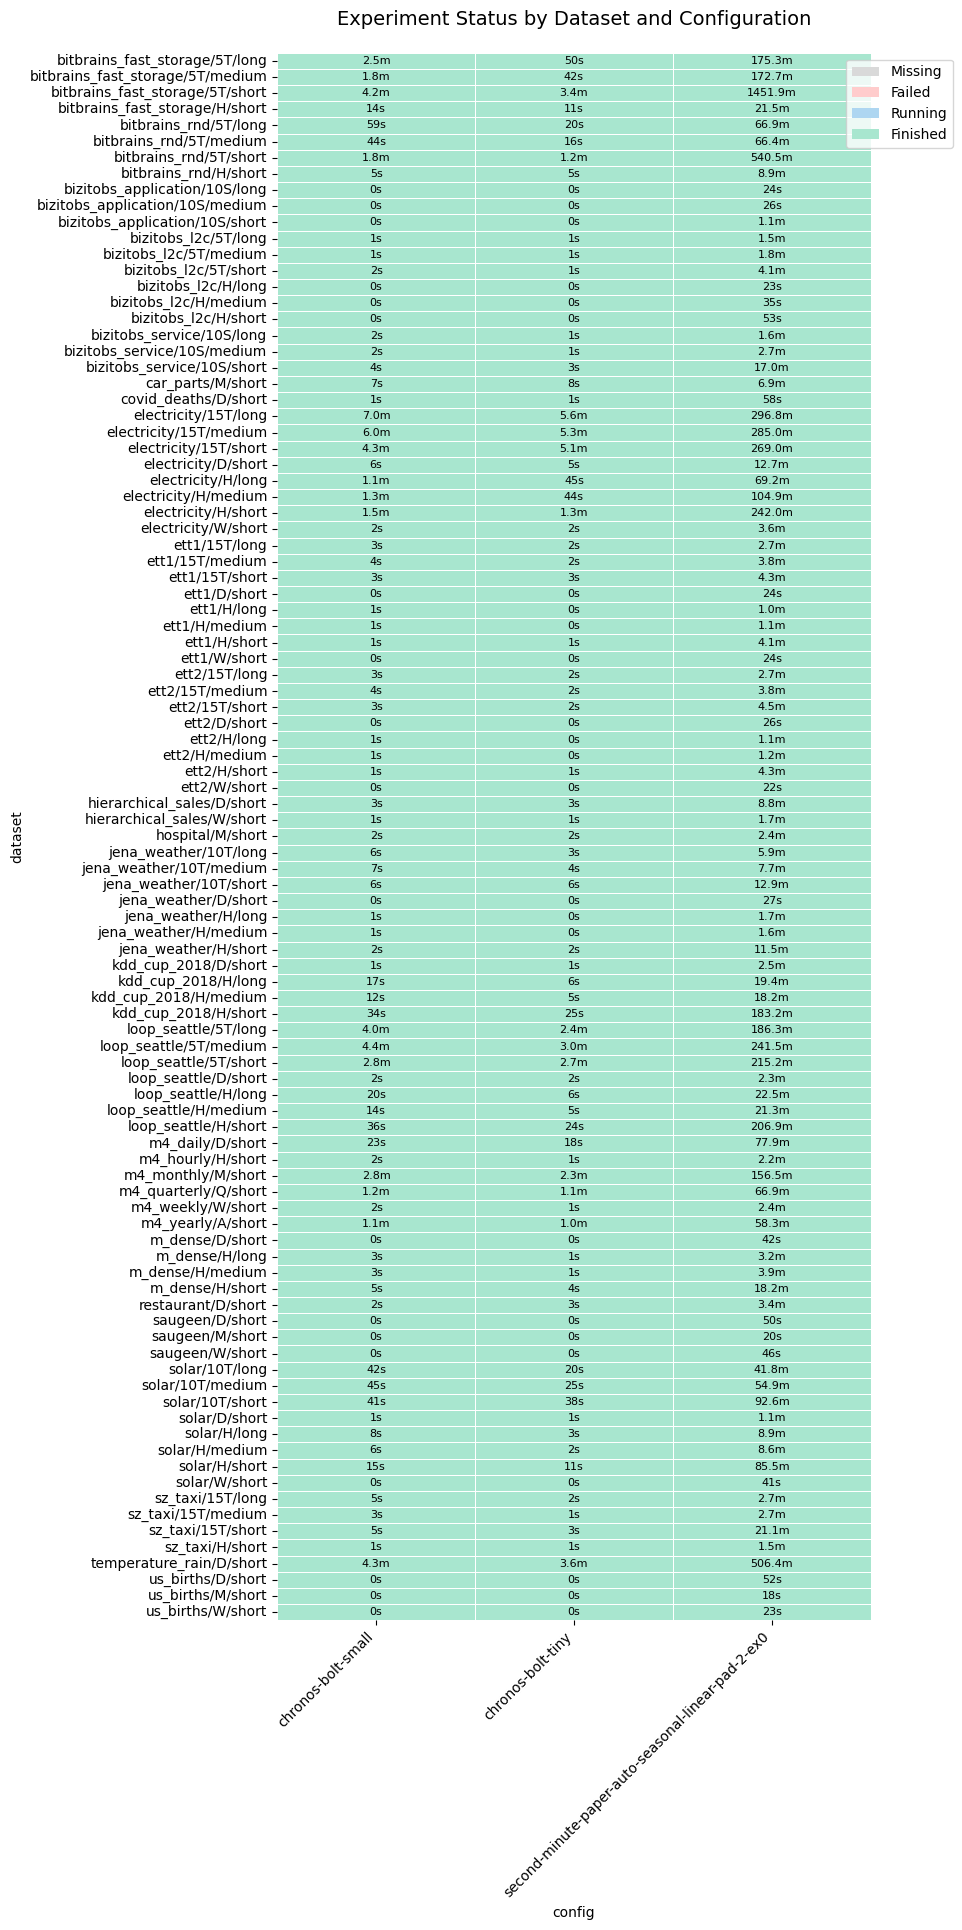

In [19]:
df = pd.concat([df, combined_results_df])
df = get_common_dataset_set(df)
fig = plot_experiment_status(df)

In [21]:
pivot_table = (
    df.pivot_table(
        index="dataset_full_name",
        columns="config_name",
        values="_runtime",
        aggfunc="mean",
    )
    .round()
    .astype(int)
)

pivot_table

config_name,chronos-bolt-small,chronos-bolt-tiny,second-minute-paper-auto-seasonal-linear-pad-2-ex0
dataset_full_name,,,
bitbrains_fast_storage/5T/long,147,50,10518
bitbrains_fast_storage/5T/medium,105,42,10364
bitbrains_fast_storage/5T/short,251,204,87116
bitbrains_fast_storage/H/short,14,11,1292
bitbrains_rnd/5T/long,59,20,4013
...,...,...,...
sz_taxi/H/short,1,1,88
temperature_rain/D/short,260,214,30382
us_births/D/short,0,0,52


In [26]:
# Rename model
rename_map = {
    "chronos-bolt-tiny": "Chronos-Bolt-Tiny",
    "chronos-bolt-small": "Chronos-Bolt-Small",
    "second-minute-paper-auto-seasonal-linear-pad-2-ex0": "TabPFN-TS",
}

pivot_table.rename(columns=rename_map, inplace=True)

In [30]:
pivot_table_latex = pivot_table.to_latex()
print(pivot_table_latex)

\begin{tabular}{lrrr}
\toprule
config_name & Chronos-Bolt-Small & Chronos-Bolt-Tiny & TabPFN-TS \\
dataset_full_name &  &  &  \\
\midrule
bitbrains_fast_storage/5T/long & 147 & 50 & 10518 \\
bitbrains_fast_storage/5T/medium & 105 & 42 & 10364 \\
bitbrains_fast_storage/5T/short & 251 & 204 & 87116 \\
bitbrains_fast_storage/H/short & 14 & 11 & 1292 \\
bitbrains_rnd/5T/long & 59 & 20 & 4013 \\
bitbrains_rnd/5T/medium & 44 & 16 & 3985 \\
bitbrains_rnd/5T/short & 107 & 72 & 32427 \\
bitbrains_rnd/H/short & 5 & 5 & 534 \\
bizitobs_application/10S/long & 0 & 0 & 24 \\
bizitobs_application/10S/medium & 0 & 0 & 26 \\
bizitobs_application/10S/short & 0 & 0 & 68 \\
bizitobs_l2c/5T/long & 1 & 1 & 87 \\
bizitobs_l2c/5T/medium & 1 & 1 & 108 \\
bizitobs_l2c/5T/short & 2 & 1 & 247 \\
bizitobs_l2c/H/long & 0 & 0 & 23 \\
bizitobs_l2c/H/medium & 0 & 0 & 35 \\
bizitobs_l2c/H/short & 0 & 0 & 53 \\
bizitobs_service/10S/long & 2 & 1 & 94 \\
bizitobs_service/10S/medium & 2 & 1 & 160 \\
bizitobs_service/10S/sh